## Imports

In [2]:
import pandas as pd
import sys

sys.path.insert(0,'../src')

from postprocess import *

### Load the interaction results

In [3]:
# For SATORI based interactions
df_A = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.08.txt',sep='\t')
#df_A = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8d/Interactions_SATORI/interactions_summary_attnLimit-0.04.txt',sep='\t')

# For FIS based interactions
df_B = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-50.0.txt',sep='\t')
#df_B = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Load the annotation file

In [4]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

### Pre-process the interactions

In [5]:
ATTN = preprocess_for_comparison(df_A, annotation_df=df_annotate)
DFIM = preprocess_for_comparison(df_B, annotation_df=df_annotate)

### Individual interactions analysis

#### Get unique interactions per method and their intersection

In [6]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='TF_Interaction')

In [7]:
DFIM_unique

SOX1$\longleftrightarrow$KDM2B                114
TLX2$\longleftrightarrow$KDM2B                107
SOX1$\longleftrightarrow$TLX2                 106
SOX1$\longleftrightarrow$DNMT1                 62
TLX2$\longleftrightarrow$DNMT1                 56
                                             ... 
HOXA6$\longleftrightarrow$HHEX                  1
ZKSCAN1$\longleftrightarrow$SOX1                1
LCOR$\longleftrightarrow$HOXA11                 1
ENSG00000235187$\longleftrightarrow$HOXA11      1
FOXK2$\longleftrightarrow$TLX2                  1
Name: TF_Interaction, Length: 168, dtype: int64

In [6]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 168, SATORI: 123, Common: 86


#### Comparison plot: individual interactions

In [7]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(DFIM_unique, ATTN_unique)

In [8]:
df_res['in_both'].value_counts()

b    106
r     62
Name: in_both, dtype: int64

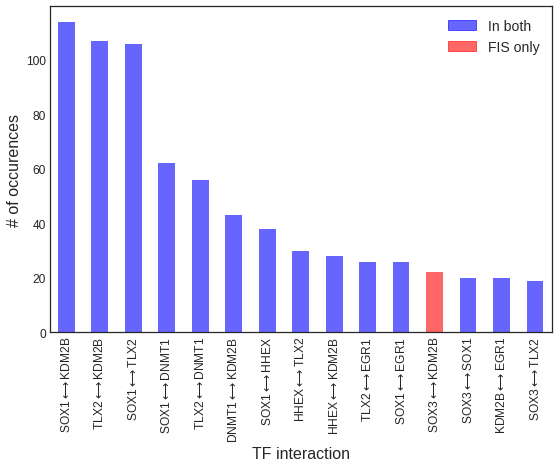

In [9]:
plot_interaction_comparison(df_res, first_n=15, xlabel='TF interaction', store_pdf_path='output/human_satori-vs-fis_TFs.pdf', fig_size=(9,6))

### Family interactions analysis

#### Get unique family interactions per method and their intersection

In [10]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='Family_Interaction')

In [11]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 33, SATORI: 28, Common: 24


#### Comparison plot: family interactions

In [12]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(DFIM_unique, ATTN_unique)

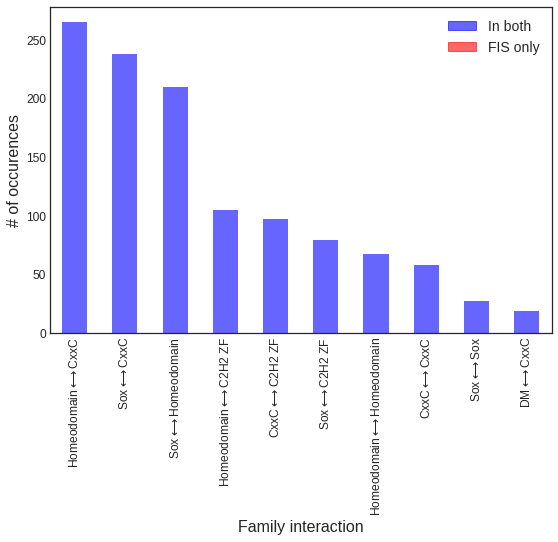

In [13]:
plot_interaction_comparison(df_res, first_n=10, xlabel='Family interaction', store_pdf_path='output/human_satori-vs-fis_Fams.pdf', fig_size=(9,6))